## Notebook desenvolvido para exemplificar o uso da correlação entre o Gradiente Total e o Gradiente Vertical

In [1]:
import sys
import numpy
from matplotlib import pyplot

In [31]:
a = sys.path.append('/home/delimar/Documents/sources/')

In [33]:
from codes import auxiliars, grids, prism, derivative, filtering, statistical, equivalentlayer

In [11]:
from codes.plot import draw_prism

In [6]:
# Define area e numero de pontos
nx, ny = 200, 200
area = [-5000., 5000., -5000., 5000.]

In [7]:
xo, yo, zo = grids.regular_grid(area, (nx, ny), -100.)

In [8]:
modelo1 = [-1500., 1500., -1500., 1500., 100., 1100.]

In [9]:
tfa = prism.prism_tf(xo, yo, zo, modelo1, 2., 20., 15.)
tfp = prism.prism_tf(xo, yo, zo, modelo1, 2., 90., 0.)

In [10]:
xo = xo.reshape((nx,ny))
yo = yo.reshape((nx,ny))
tfa = tfa.reshape((nx,ny))
tfp = tfp.reshape((nx,ny))

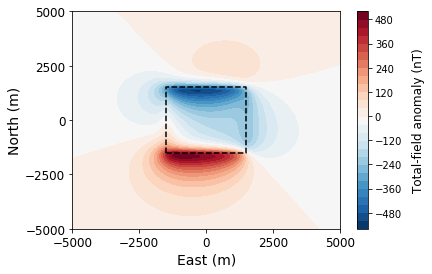

In [12]:
pyplot.figure(figsize=(6,4))
cs = pyplot.contourf(yo, xo, tfa, 25, cmap = pyplot.cm.RdBu_r)
draw_prism(modelo1[:4], linewidth = 1., style = 'k--', xy2ne = True)
#pyplot.title('Magnetic total field anomaly (nT)', fontsize = 16)
pyplot.xlabel('East (m)', fontsize = 14)
pyplot.ylabel('North (m)', fontsize = 14)
pyplot.xticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
#pyplot.legend(loc = 'lower center', fontsize = 'x-large')
cb = pyplot.colorbar(cs)
cb.set_label('Total-field anomaly (nT)', fontsize = 12, labelpad = 10)
pyplot.show()

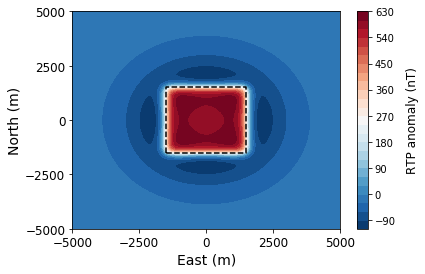

In [13]:
pyplot.figure(figsize=(6,4))
cs = pyplot.contourf(yo, xo, tfp, 25, cmap = pyplot.cm.RdBu_r)
draw_prism(modelo1[:4], linewidth = 1., style = 'k--', xy2ne = True)
#pyplot.title('Magnetic total field anomaly (nT)', fontsize = 16)
pyplot.xlabel('East (m)', fontsize = 14)
pyplot.ylabel('North (m)', fontsize = 14)
pyplot.xticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
#pyplot.legend(loc = 'lower center', fontsize = 'x-large')
cb = pyplot.colorbar(cs)
cb.set_label('RTP anomaly (nT)', fontsize = 12, labelpad = 10)
pyplot.show()

In [15]:
gt = derivative.totalgrad(xo, yo, tfa)
gv = derivative.zderiv(xo, yo, tfa)

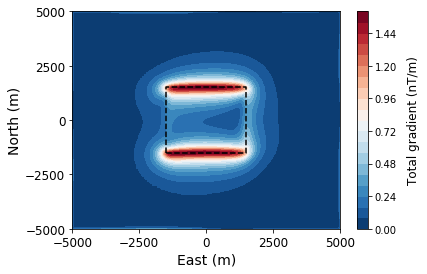

In [16]:
pyplot.figure(figsize=(6,4))
cs = pyplot.contourf(yo, xo, gt, 25, cmap = pyplot.cm.RdBu_r)
draw_prism(modelo1[:4], linewidth = 1., style = 'k--', xy2ne = True)
#pyplot.title('Magnetic total field anomaly (nT)', fontsize = 16)
pyplot.xlabel('East (m)', fontsize = 14)
pyplot.ylabel('North (m)', fontsize = 14)
pyplot.xticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
#pyplot.legend(loc = 'lower center', fontsize = 'x-large')
cb = pyplot.colorbar(cs)
cb.set_label('Total gradient (nT/m)', fontsize = 12, labelpad = 10)
pyplot.show()

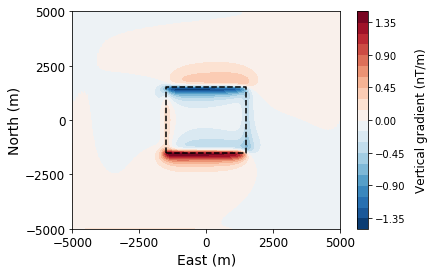

In [17]:
pyplot.figure(figsize=(6,4))
cs = pyplot.contourf(yo, xo, gv, 25, cmap = pyplot.cm.RdBu_r)
draw_prism(modelo1[:4], linewidth = 1., style = 'k--', xy2ne = True)
#pyplot.title('Magnetic total field anomaly (nT)', fontsize = 16)
pyplot.xlabel('East (m)', fontsize = 14)
pyplot.ylabel('North (m)', fontsize = 14)
pyplot.xticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
#pyplot.legend(loc = 'lower center', fontsize = 'x-large')
cb = pyplot.colorbar(cs)
cb.set_label('Vertical gradient (nT/m)', fontsize = 12, labelpad = 10)
pyplot.show()

In [18]:
xp1, yp1, pp1 = grids.profile(xo.reshape(xo.size), yo.reshape(yo.size), tfa.reshape(tfa.size), 
                        (-2500., 1000.), (2500., -1500.), 200)
xp2, yp2, pp2 = grids.profile(xo.reshape(xo.size), yo.reshape(yo.size), tfp.reshape(tfp.size), 
                        (-2500., 1000.), (2500., -1500.), 200)
xp3, yp3, pp3 = grids.profile(xo.reshape(xo.size), yo.reshape(yo.size), gt.reshape(gt.size), 
                        (-2500., 1000.), (2500., -1500.), 200)
xp4, yp4, pp4 = grids.profile(xo.reshape(xo.size), yo.reshape(yo.size), gv.reshape(gv.size), 
                        (-2500., 1000.), (2500., -1500.), 200)

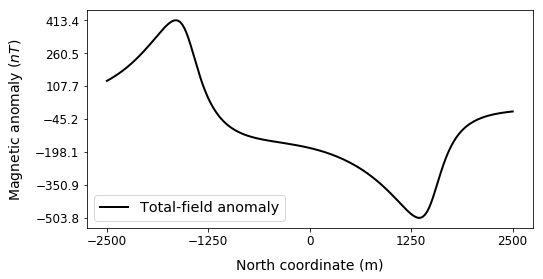

In [19]:
pyplot.figure(figsize = (8, 4))
pyplot.plot(xp1, pp1, 'k-', label = 'Total-field anomaly', linewidth = 2.)
pyplot.xlabel('North coordinate (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Magnetic anomaly $(nT)$', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(xp1.min(), xp1.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(pp1.min(), pp1.max(), 7), fontsize = 12)
pyplot.legend(loc = 'lower left', fontsize = 'x-large')
pyplot.show()

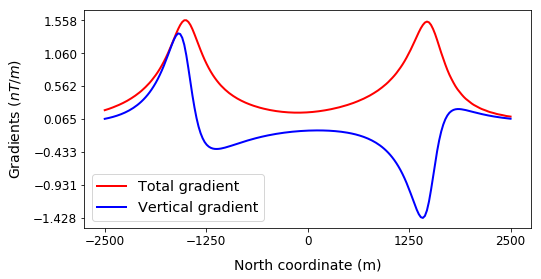

In [20]:
pyplot.figure(figsize = (8, 4))
pyplot.plot(xp3, pp3, 'r-', label = 'Total gradient', linewidth = 2.)
pyplot.plot(xp4, pp4, 'b-', label = 'Vertical gradient', linewidth = 2.)
pyplot.xlabel('North coordinate (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Gradients $(nT/m)$', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(xp3.min(), xp3.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(pp4.min(), pp3.max(), 7), fontsize = 12)
pyplot.legend(loc = 'lower left', fontsize = 'x-large')
pyplot.show()

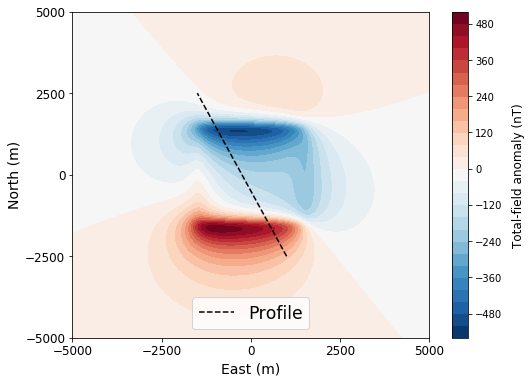

In [21]:
pyplot.figure(figsize=(8,6))
cs = pyplot.contourf(yo, xo, tfa, 25, cmap = pyplot.cm.RdBu_r)
pyplot.plot(yp1, xp1, 'k--', label = 'Profile')
#pyplot.title('Magnetic total field anomaly (nT)', fontsize = 16)
pyplot.xlabel('East (m)', fontsize = 14)
pyplot.ylabel('North (m)', fontsize = 14)
pyplot.xticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.legend(loc = 'lower center', fontsize = 'xx-large')
cb = pyplot.colorbar(cs)
cb.set_label('Total-field anomaly (nT)', fontsize = 12, labelpad = 10)
pyplot.show()

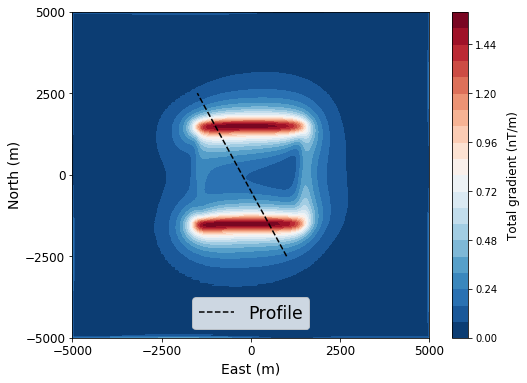

In [22]:
pyplot.figure(figsize=(8,6))
cs = pyplot.contourf(yo, xo, gt, 25, cmap = pyplot.cm.RdBu_r)
pyplot.plot(yp1, xp1, 'k--', label = 'Profile')
#pyplot.title('Magnetic total field anomaly (nT)', fontsize = 16)
pyplot.xlabel('East (m)', fontsize = 14)
pyplot.ylabel('North (m)', fontsize = 14)
pyplot.xticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.legend(loc = 'lower center', fontsize = 'xx-large')
cb = pyplot.colorbar(cs)
cb.set_label('Total gradient (nT/m)', fontsize = 12, labelpad = 10)
pyplot.show()

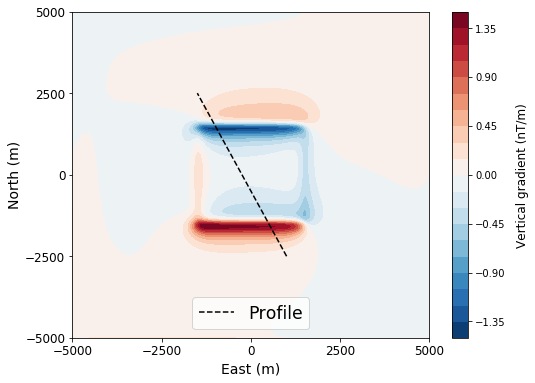

In [23]:
pyplot.figure(figsize=(8,6))
cs = pyplot.contourf(yo, xo, gv, 25, cmap = pyplot.cm.RdBu_r)
pyplot.plot(yp1, xp1, 'k--', label = 'Profile')
#pyplot.title('Magnetic total field anomaly (nT)', fontsize = 16)
pyplot.xlabel('East (m)', fontsize = 14)
pyplot.ylabel('North (m)', fontsize = 14)
pyplot.xticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.legend(loc = 'lower center', fontsize = 'xx-large')
cb = pyplot.colorbar(cs)
cb.set_label('Vertical gradient (nT/m)', fontsize = 12, labelpad = 10)
pyplot.show()

## Para o dado reduzido ao Polo

In [24]:
gtp = derivative.totalgrad(xo, yo, tfp)
gvp = derivative.zderiv(xo, yo, tfp)

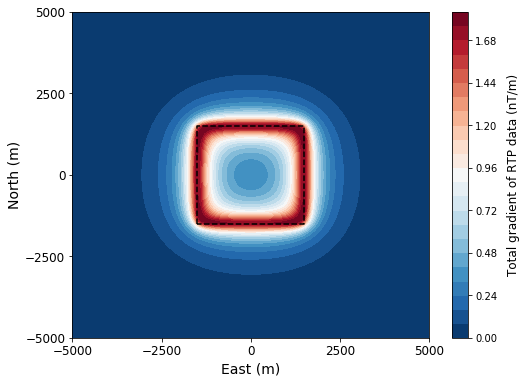

In [25]:
pyplot.figure(figsize=(8,6))
cs = pyplot.contourf(yo, xo, gtp, 25, cmap = pyplot.cm.RdBu_r)
draw_prism(modelo1[:4], linewidth = 1., style = 'k--', xy2ne = True)
#pyplot.title('Magnetic total field anomaly (nT)', fontsize = 16)
pyplot.xlabel('East (m)', fontsize = 14)
pyplot.ylabel('North (m)', fontsize = 14)
pyplot.xticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
#pyplot.legend(loc = 'lower center', fontsize = 'x-large')
cb = pyplot.colorbar(cs)
cb.set_label('Total gradient of RTP data (nT/m)', fontsize = 12, labelpad = 10)
pyplot.show()

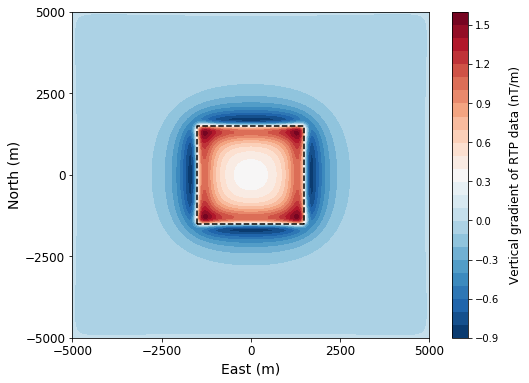

In [26]:
pyplot.figure(figsize=(8,6))
cs = pyplot.contourf(yo, xo, gvp, 25, cmap = pyplot.cm.RdBu_r)
draw_prism(modelo1[:4], linewidth = 1., style = 'k--', xy2ne = True)
#pyplot.title('Magnetic total field anomaly (nT)', fontsize = 16)
pyplot.xlabel('East (m)', fontsize = 14)
pyplot.ylabel('North (m)', fontsize = 14)
pyplot.xticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
#pyplot.legend(loc = 'lower center', fontsize = 'x-large')
cb = pyplot.colorbar(cs)
cb.set_label('Vertical gradient of RTP data (nT/m)', fontsize = 12, labelpad = 10)
pyplot.show()

In [27]:
xp5, yp5, pp5 = grids.profile(xo.reshape(xo.size), yo.reshape(yo.size), gtp.reshape(gtp.size), 
                        (-2500., 1000.), (2500., -1500.), 200)
xp6, yp6, pp6 = grids.profile(xo.reshape(xo.size), yo.reshape(yo.size), gvp.reshape(gvp.size), 
                        (-2500., 1000.), (2500., -1500.), 200)

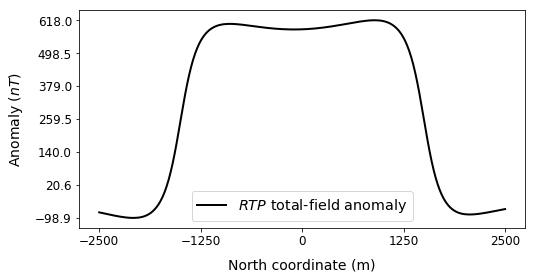

In [28]:
pyplot.figure(figsize = (8, 4))
pyplot.plot(xp1, pp2, 'k-', label = '$RTP$ total-field anomaly', linewidth = 2.)
pyplot.xlabel('North coordinate (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Anomaly $(nT)$', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(xp1.min(), xp1.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(pp2.min(), pp2.max(), 7), fontsize = 12)
pyplot.legend(loc = 'lower center', fontsize = 'x-large')
pyplot.show()

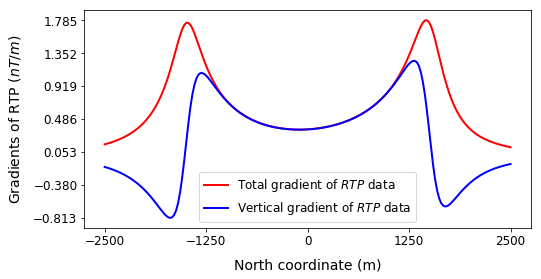

In [29]:
pyplot.figure(figsize = (8, 4))
pyplot.plot(xp5, pp5, 'r-', label = 'Total gradient of $RTP$ data', linewidth = 2.)
pyplot.plot(xp6, pp6, 'b-', label = 'Vertical gradient of $RTP$ data', linewidth = 2.)
pyplot.xlabel('North coordinate (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Gradients of RTP $(nT/m)$', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(xp3.min(), xp3.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(pp6.min(), pp5.max(), 7), fontsize = 12)
pyplot.legend(loc = 'lower center', fontsize = 'large')
pyplot.show()